In [1]:
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

**WRANGLE FUNCTION**

In [3]:
def wrangle(filepath):
    df= pd.read_csv(filepath)
    df["may_flood"]= [1 if val >0.5 else 0 for val in df["FloodProbability"]]

    return df  

In [4]:
try:
    df= wrangle('c:/Users/USER/Videos/Science/datasets/Floods/flood.csv')
    print(df.head())
except FileNotFoundError:
    print("File couldn't get opened.")
finally:
    print("File loading is over.")

   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  CoastalVulnerability  Landslides  Water

**EXPLORING THE DATA**

In [5]:
df.shape

(50000, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [7]:
df.select_dtypes("int").describe(include="all")

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,5.005020,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,2.226076,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,16.000000,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000


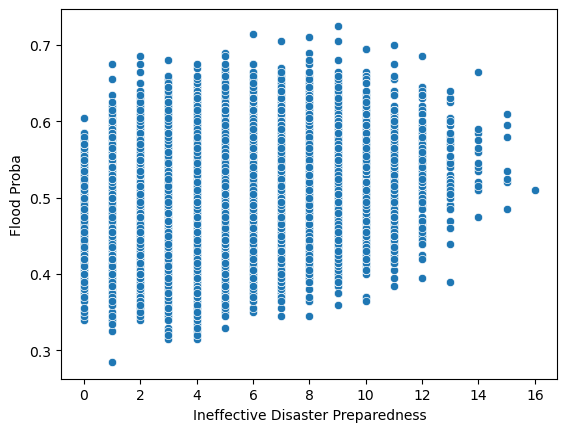

In [8]:
#Checking for a correlation between these 2 features
sns.scatterplot(x="IneffectiveDisasterPreparedness", y="FloodProbability", data=df)
plt.xlabel("Ineffective Disaster Preparedness")
plt.ylabel("Flood Proba");

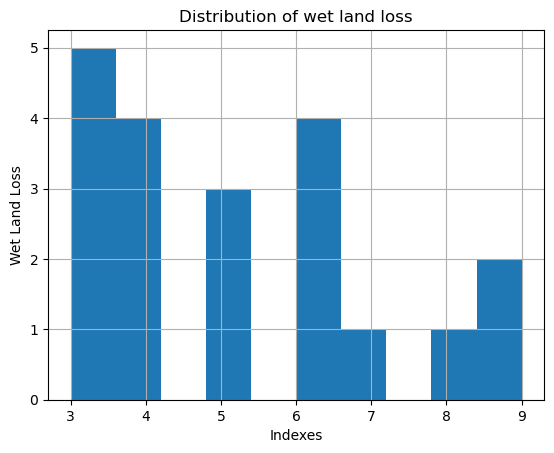

In [9]:
#Distribution of the wet land loss
df["WetlandLoss"].head(20).hist()
plt.xlabel("Indexes")
plt.ylabel("Wet Land Loss")
plt.title("Distribution of wet land loss");

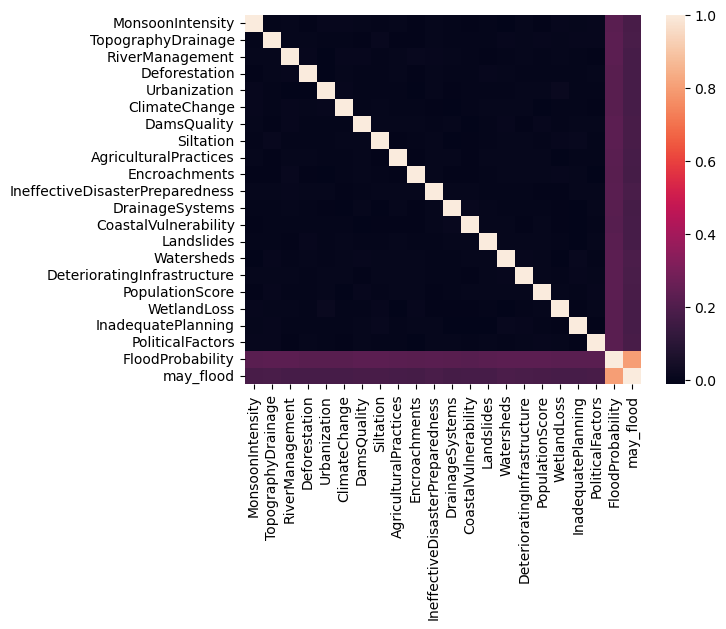

In [10]:
#Checking correlation between features
sns.heatmap(df.corr());

In [11]:
#Correlation with visual values
df.corr()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,may_flood
MonsoonIntensity,1.000000,-0.003470,0.002247,-0.005384,0.005092,0.005959,0.002790,-0.003191,0.002723,-0.003723,...,-0.004600,-0.002315,-0.008859,0.001763,-0.003597,0.005938,0.003455,0.005402,0.224081,0.179494
TopographyDrainage,-0.003470,1.000000,0.002492,0.002046,0.000116,-0.002288,-0.004472,0.010675,-0.004550,-0.007272,...,-0.000717,-0.002040,0.005312,0.003654,0.005887,0.003515,0.005276,0.008191,0.229414,0.184510
RiverManagement,0.002247,0.002492,1.000000,0.004808,-0.009651,0.007199,0.007697,-0.000389,0.003635,0.009253,...,-0.000111,-0.004339,0.000097,0.000604,-0.001382,0.002012,0.000364,-0.006323,0.228917,0.177035
Deforestation,-0.005384,0.002046,0.004808,1.000000,-0.011325,0.000517,-0.000728,-0.000823,0.002929,-0.003507,...,-0.003019,0.005258,0.002171,-0.002093,0.000138,-0.000718,-0.001108,0.001242,0.220237,0.177380
Urbanization,0.005092,0.000116,-0.009651,-0.011325,1.000000,0.007478,0.000268,-0.001287,-0.001391,-0.011386,...,-0.000881,-0.000651,-0.003479,0.004222,0.002154,0.013263,-0.000864,-0.002418,0.220867,0.174663
ClimateChange,0.005959,-0.002288,0.007199,0.000517,0.007478,1.000000,-0.002889,0.001514,-0.003362,0.000075,...,-0.001467,0.000689,0.003023,0.003281,-0.008334,-0.000547,-0.000186,-0.004453,0.220986,0.176253
DamsQuality,0.002790,-0.004472,0.007697,-0.000728,0.000268,-0.002889,1.000000,0.003239,0.001743,0.001638,...,-0.009503,0.000436,0.005322,-0.004001,0.006856,-0.000662,0.001535,0.001699,0.227467,0.182089
Siltation,-0.003191,0.010675,-0.000389,-0.000823,-0.001287,0.001514,0.003239,1.000000,-0.003911,0.000158,...,-0.003564,-0.001866,0.003682,0.003045,-0.002484,0.007903,0.011918,-0.001597,0.226544,0.181154
AgriculturalPractices,0.002723,-0.004550,0.003635,0.002929,-0.001391,-0.003362,0.001743,-0.003911,1.000000,-0.006564,...,-0.003708,0.004142,0.004371,0.003248,0.001678,-0.007963,-0.002221,-0.001280,0.221846,0.175999
Encroachments,-0.003723,-0.007272,0.009253,-0.003507,-0.011386,0.000075,0.001638,0.000158,-0.006564,1.000000,...,-0.006591,-0.003032,0.003679,0.002774,0.003874,0.005706,0.001380,-0.007547,0.218259,0.172441


In [13]:
#Used to see which probability to consider in order to say whether floods will appear or not
#This will be used in our wrangle function
df["FloodProbability"].unique()

array([0.45 , 0.475, 0.515, 0.52 , 0.47 , 0.57 , 0.585, 0.58 , 0.555,
       0.455, 0.525, 0.48 , 0.44 , 0.465, 0.53 , 0.485, 0.55 , 0.605,
       0.495, 0.445, 0.545, 0.575, 0.43 , 0.565, 0.56 , 0.505, 0.635,
       0.425, 0.595, 0.46 , 0.61 , 0.5  , 0.42 , 0.51 , 0.54 , 0.355,
       0.62 , 0.415, 0.59 , 0.6  , 0.49 , 0.615, 0.535, 0.435, 0.405,
       0.41 , 0.38 , 0.385, 0.4  , 0.395, 0.675, 0.39 , 0.625, 0.34 ,
       0.37 , 0.63 , 0.365, 0.66 , 0.68 , 0.36 , 0.64 , 0.375, 0.665,
       0.345, 0.65 , 0.35 , 0.645, 0.67 , 0.655, 0.32 , 0.71 , 0.69 ,
       0.705, 0.335, 0.7  , 0.315, 0.325, 0.685, 0.695, 0.715, 0.33 ,
       0.285, 0.725])

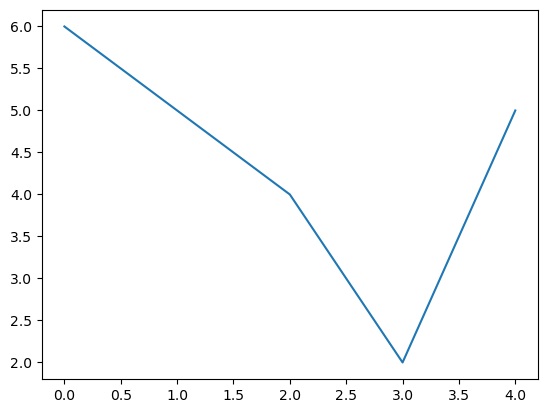

In [15]:
#This one was made just for learning
df["RiverManagement"].head().plot();    

In [16]:
df["TopographyDrainage"].min()

0

In [16]:
#Checking for duplicated datas
df.duplicated().sum()

0

**SPLITTING OUR DATASET**

In [18]:
#TIME TO SPLIT
target="may_flood"
X=df.drop(columns=[target, "FloodProbability"])
y=df[target]

print(X.head())
print(y.head())

   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSys

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test.shape)

(40000, 20)
(10000, 20)
(10000,)
(10000,)


In [21]:
baseline_score= y_train.value_counts(normalize=True)
baseline_score

may_flood
0    0.531125
1    0.468875
Name: proportion, dtype: float64

**BUILD MODEL**

In [22]:
model= LogisticRegression(max_iter= 1000, class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [23]:
model.score(X_train, y_train)

1.0

**CROSS VALIDATION FOR OUR MODEL**

In [24]:
scores= cross_val_score(model, X, y, cv=6)

In [25]:
print(type(scores))

<class 'numpy.ndarray'>


In [26]:
for i in scores:
    print(i)

1.0
1.0
1.0
1.0
1.0
1.0


In [31]:
with open("c:/Users/USER/Videos/Science/datasets/Floods/model_flood.pkl", "wb") as f:
    pickle.dump(model, f)

In [32]:
X.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

**COMMUNICATION**

In [33]:
features = X_train.columns
coeffs = model.coef_[0]
intercept = model.intercept_[0]

# Building the equation
equation = f"Log-odds = {intercept:.3f} "

for feat, coef in zip(features, coeffs):
    sign = "+" if coef >= 0 else "-"
    equation += f"{sign} {abs(coef):.3f}*{feat} "

print("Logistic Model Equation :")
print(equation)

Logistic Model Equation:
Log-odds = -530.967 + 5.280*MonsoonIntensity + 5.289*TopographyDrainage + 5.267*RiverManagement + 5.274*Deforestation + 5.279*Urbanization + 5.296*ClimateChange + 5.295*DamsQuality + 5.282*Siltation + 5.278*AgriculturalPractices + 5.284*Encroachments + 5.279*IneffectiveDisasterPreparedness + 5.286*DrainageSystems + 5.296*CoastalVulnerability + 5.281*Landslides + 5.285*Watersheds + 5.291*DeterioratingInfrastructure + 5.298*PopulationScore + 5.274*WetlandLoss + 5.278*InadequatePlanning + 5.283*PoliticalFactors 


In [34]:
print("P(Y=1) = 1 / (1 + exp( - (", equation, "))")

P(Y=1) = 1 / (1 + exp( - ( Log-odds = -530.967 + 5.280*MonsoonIntensity + 5.289*TopographyDrainage + 5.267*RiverManagement + 5.274*Deforestation + 5.279*Urbanization + 5.296*ClimateChange + 5.295*DamsQuality + 5.282*Siltation + 5.278*AgriculturalPractices + 5.284*Encroachments + 5.279*IneffectiveDisasterPreparedness + 5.286*DrainageSystems + 5.296*CoastalVulnerability + 5.281*Landslides + 5.285*Watersheds + 5.291*DeterioratingInfrastructure + 5.298*PopulationScore + 5.274*WetlandLoss + 5.278*InadequatePlanning + 5.283*PoliticalFactors  ))
